**Extracting parameters from the non-linear power spectrum using a Random Forest Regressor**
Paper: arXiv:2106.11061

In [ ]:
#parameters [0=Omega_matter,1=Omega_baryon, 2=h, 3=ns, 4=sigma8] 

In [ ]:
# load the relevant Python libraries
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import  Dense, Flatten, Conv3D, MaxPooling3D,Dropout
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir project

In [ ]:
! cp /content/drive/MyDrive/sims64v2.zip project/

In [ ]:
! unzip project/sims64v2.zip
! rm project/sims64v2.zip

## **Power spectrum data (z=0)**

In [ ]:
#read the power spectra (X) and the relevant input parameters (y)
def load_PS_data():
    Xp = []
    yp = []
    print('Read PS')
    for i in range(2000):
        image_path = os.path.join('files/HR/Pk_m_z=0_'+ str(i) + '.txt')
        label_path = os.path.join('files/params_r_'+ str(i) + '.dat')
        img = np.loadtxt(image_path)
        lbl = np.loadtxt(label_path)
        Xp.append(img)
        yp.append(lbl)
    return Xp, yp

In [ ]:
Xp,yp = load_PS_data()
Xp=np.array(Xp)
yp=np.array(yp)

Read PS


In [ ]:
img = np.loadtxt('files/HR/Pk_m_z=0_'+ str(0) + '.txt')

In [ ]:
img

array([[8.89964122e-03, 9.78135154e+04],
       [1.50791222e-02, 8.96189540e+04],
       [2.14479019e-02, 8.34521054e+04],
       ...,
       [5.55749331e+00, 9.83821019e+01],
       [5.56228171e+00, 1.18722614e+02],
       [5.56927272e+00, 2.77702198e+02]])

In [ ]:
# remove the k-values as they are common to all spectra
Xp2 = np.delete(Xp,0,axis=2)

In [ ]:
# take the log of the spectra to decrease the spread of the input data 
Xp2 = Xp2.reshape((-1, 886))
Xp3 = np.log(Xp2)

In [ ]:
# split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(Xp3, yp, test_size=0.2, random_state=42)

In [ ]:
# create 5 Random Forest Regressors (corresponding to the 5 cosmological parameters)
regr0 = RandomForestRegressor(max_depth=20, random_state=42)
regr1 = RandomForestRegressor(max_depth=20, random_state=42)
regr2 = RandomForestRegressor(max_depth=20, random_state=42)
regr3 = RandomForestRegressor(max_depth=20, random_state=42)
regr4 = RandomForestRegressor(max_depth=20, random_state=42)

In [ ]:
# fit the regressors on the training set
regr0.fit(X_train, y_train[:,0])
regr1.fit(X_train, y_train[:,1])
regr2.fit(X_train, y_train[:,2])
regr3.fit(X_train, y_train[:,3])
regr4.fit(X_train, y_train[:,4])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
# predict the cosmological parameters on the test set
pred0 = regr0.predict(X_test)
pred1 = regr1.predict(X_test)
pred2 = regr2.predict(X_test)
pred3 = regr3.predict(X_test)
pred4 = regr4.predict(X_test)

Text(0, 0.5, 'True value')

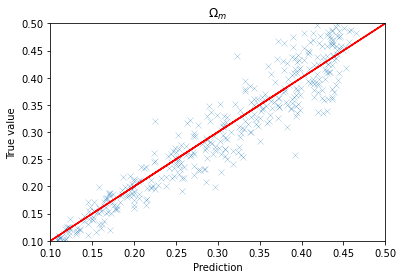

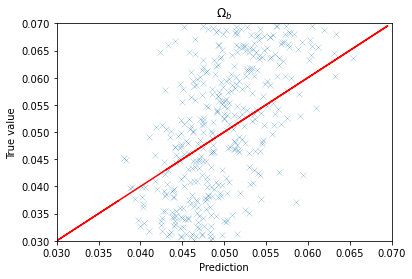

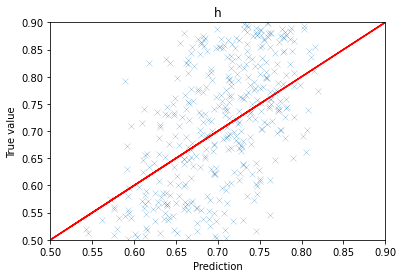

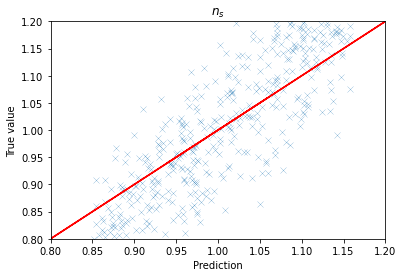

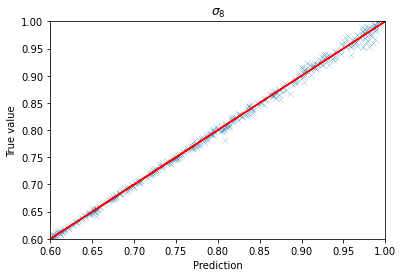

In [ ]:
# plot the results
plt.figure()
plt.scatter(pred0[:],y_test[:,0],marker='x',linewidth=0.2)
plt.plot(y_test[:,0],y_test[:,0],'r')
plt.xlim(0.1,0.5)
plt.ylim(0.1,0.5)
#plt.axis('equal')
plt.title('$\Omega_m$')
plt.xlabel('Prediction')
plt.ylabel('True value')

plt.figure()
plt.scatter(pred1[:],y_test[:,1],marker='x',linewidth=0.2)
plt.plot(y_test[:,1],y_test[:,1],'r')
plt.xlim(0.03,0.07)
plt.ylim(0.03,0.07)
#plt.axis('equal')
plt.title('$\Omega_b$')
plt.xlabel('Prediction')
plt.ylabel('True value')

plt.figure()
plt.scatter(pred2[:],y_test[:,2],marker='x',linewidth=0.2)
plt.plot(y_test[:,2],y_test[:,2],'r')
plt.xlim(0.5,0.9)
plt.ylim(0.5,0.9)
#plt.axis('equal')
plt.title('h')
plt.xlabel('Prediction')
plt.ylabel('True value')

plt.figure()
plt.scatter(pred3[:],y_test[:,3],marker='x',linewidth=0.2)
plt.plot(y_test[:,3],y_test[:,3],'r')
plt.xlim(0.8,1.2)
plt.ylim(0.8,1.2)
#plt.axis('equal')
plt.title('$n_s$')
plt.xlabel('Prediction')
plt.ylabel('True value')

plt.figure()
plt.scatter(pred4[:],y_test[:,4],marker='x',linewidth=0.2)
plt.plot(y_test[:,4],y_test[:,4],'r')
plt.xlim(0.6,1)
plt.ylim(0.6,1)
#plt.axis('equal')
plt.title('$\sigma_8$')
plt.xlabel('Prediction')
plt.ylabel('True value')

In [ ]:
! mkdir /content/drive/MyDrive/results/ps5_rf

In [ ]:
np.savetxt('/content/drive/MyDrive/results/ps5_rf/y_test.csv', y_test, delimiter=',')
np.savetxt('/content/drive/MyDrive/results/ps5_rf/pred0.csv', pred0, delimiter=',')
np.savetxt('/content/drive/MyDrive/results/ps5_rf/pred1.csv', pred1, delimiter=',')
np.savetxt('/content/drive/MyDrive/results/ps5_rf/pred2.csv', pred2, delimiter=',')
np.savetxt('/content/drive/MyDrive/results/ps5_rf/pred3.csv', pred3, delimiter=',')
np.savetxt('/content/drive/MyDrive/results/ps5_rf/pred4.csv', pred4, delimiter=',')